# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Samy Aïmeur

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

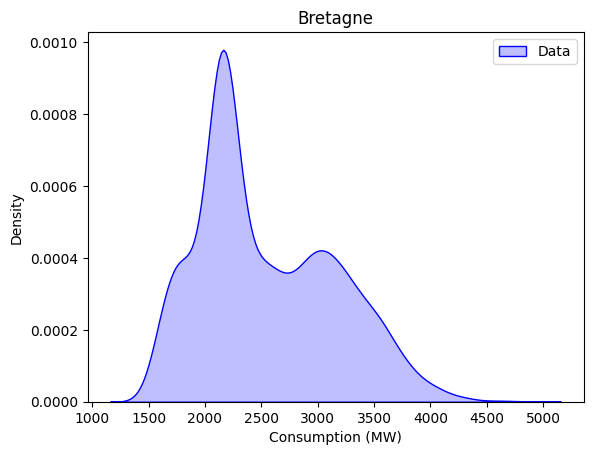

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

Par linéarité de l'espérance, on a :
$$
\mathbb{E}(\hat \mu) = \mathbb{E}(\frac 1 n \sum_{i=1}^n x_i)= \sum_{i=1}^n\frac 1 n \mathbb{E}(x_i)
$$
Les $x_1,\ldots,x_n$ sont i.i.d. donc 
$$ \forall i \in [0,\ldots,n] \quad \mathbb{E}(x_i)= \mathbb{E}(x_1),  \quad \mathbb{E}(\hat \mu) = \sum_{i=1}^n\frac 1 n \mathbb{E}(x_1)=\mathbb{E}(x_1)$$

Finalement : $$Biais(\hat \mu, \mathbb{E}(x_1))= 0 $$




De même pour  $\hat{\sigma^2}$ :

$$\mathbb{E}(\hat{\sigma^2}) = \mathbb{E}(\frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2) $$

$$= \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}((x_i - \hat \mu)^2)$$

Pour $i \in [[1,\ldots,n]], $ calculons $\mathbb{E}((x_i - \hat \mu)^2)$

$$\mathbb{E}((x_i - \hat \mu)^2) = \mathbb{E}(x_i^2) + \mathbb{E}(\hat \mu^2) -2\mathbb{E}(x_i \hat \mu)$$

Avec : $$\mathbb{E}(x_i \hat \mu) = \frac 1 n\sum_{j=1}^n\mathbb{E}(x_ix_j) =\frac {(n-1)} n\mathbb{E}(x_i)^2 + \frac 1 n\mathbb{E}((x_i)^2) $$
$$ \mathbb{E}((\hat \mu)^2) = \mathbb{E}(\frac 1 {n^2}\sum_{i=1}^n \sum_{j=1}^n x_ix_j) 
= \frac 1 {n^2}(\sum_{i=1}^n \sum_{j=1, j\neq i}^n\mathbb{E}(x_ix_j) + \sum_{i=1}^n\mathbb{E}(x_i^2))
= \frac {n(n-1)} {n^2}\mathbb{E}(x_1)^2 + \frac 1 n\mathbb{E}(x_1^2)
$$

En regroupant les termes on obtient :
$$
\mathbb{E}((x_i - \hat \mu)^2) = \frac {n-1} n(\mathbb{E}(x_1^2) - \mathbb{E}(x_1)^2) = \frac {n-1} n\mathbb{V}(x_1)
$$

Finalement :
$$ \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n \mathbb{E}((x_i - \hat \mu)^2) = \mathbb{V}(x_1) $$
$$ Biais(\sigma^2, \mathbb{V}(x_1))= 0 $$

Les deux estimateurs sont biens sans biais


2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [12]:
mu = df_region['consumption'].mean()
n = df_region['consumption'].count()

# c'est équivalent de définir mu de cette façon : dff['consumption'].sum()/n

nu_sqr= df_region['consumption'].apply(lambda x: (x-mu) ** 2).sum()/(n-1)

# c'est équivalent de définir nu_sqr de cette façon : ((df_region['consumption']-mu)**2).sum())/(n-1)

(mu, nu_sqr)

df_region

,region,date,consumption
7606,Bretagne,2013-01-01,2595
7607,Bretagne,2013-01-02,3195
7608,Bretagne,2013-01-03,3157
7609,Bretagne,2013-01-04,3142
7610,Bretagne,2013-01-05,2859
...,...,...,...
11404,Bretagne,2023-05-27,1761
11405,Bretagne,2023-05-28,1610
11406,Bretagne,2023-05-29,1677
11407,Bretagne,2023-05-30,2057


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [13]:
data = np.random.normal(mu,np.sqrt(nu_sqr),n)
df_generate_data = pd.DataFrame({'consumption' : data})
df_generate_data

,consumption
0,1097.730816
1,2195.334424
2,3175.646151
3,2096.744571
4,2445.755679
...,...
3798,2964.965803
3799,3354.559851
3800,2367.070501
3801,1575.349083


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

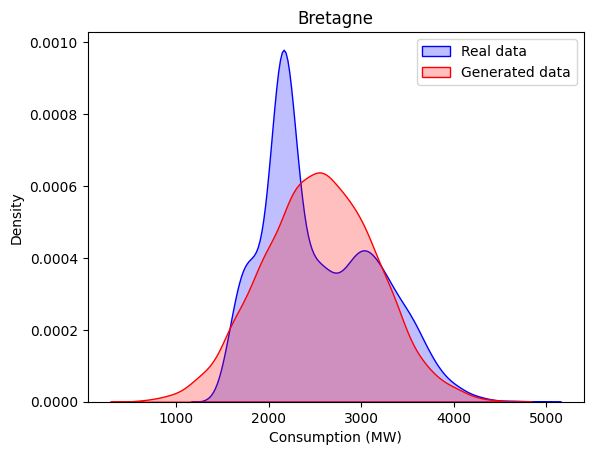

In [14]:
sns.kdeplot(data=df_region, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data=df_generate_data, x="consumption", label="Generated data", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

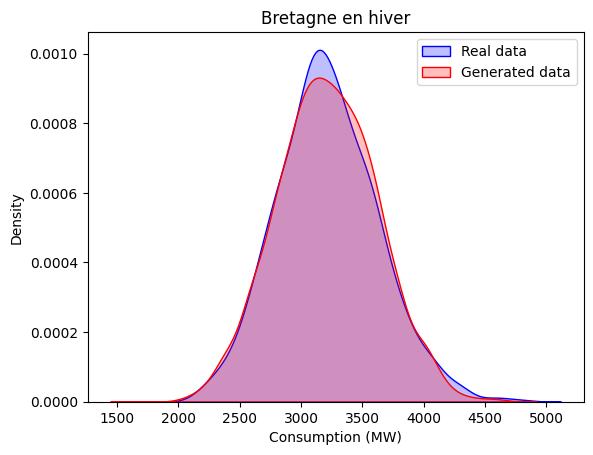

3214.1782077393077

In [15]:
#On filtre nos données en prenant en compte l'hiver 2013 même si il n'est pas complet
a=[]
for i in range(2012,2023):
    b=df_region[(df_region['date']>= str(i)+'-12-22') & (df_region['date'] <= str(i+1)+'-03-21')] #Pour chaque hiver on selectionne les données
    a.append(b)
df_Bretagne_time_period = pd.concat(a)

#On défini les estimateurs sur notre nouveau jeux de données
mu2 = df_Bretagne_time_period['consumption'].mean()
n2 = df_Bretagne_time_period['consumption'].count()
nu_sqr2= df_Bretagne_time_period['consumption'].apply(lambda x: (x-mu2) ** 2).sum()/(n2-1)

#On génère des nouvelles données suivant un modèle gaussien
data2 = np.random.normal(mu2,np.sqrt(nu_sqr2),n)
df_generate_data2 = pd.DataFrame({'consumption' : data2})

#On plot les 2 set de données
sns.kdeplot(data=df_Bretagne_time_period, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data=df_generate_data2, x="consumption", label="Generated data", color='red', fill=True)
plt.title('Bretagne en hiver')
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()
mu2

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

Visuelement, il est très claire de voir que dans le cas numéro 2 (quand on se place en Bretagne et en hiver) l'hypothèse gaussienne est plus appropriée.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

Preuve que $d(f,g) \in [0,1]$ :
$$ 0 \leqslant \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leqslant \frac 1 2 \int (|f(x)| + |g(x)|)\mathrm dx = \frac 1 2 \int f(x)\mathrm dx + g(x)\mathrm dx = 1$$
$$\implies 0 \leqslant d(f,g) \leqslant 1$$
<br>

Si on a $f=g$ presque partout (pour la mesure de Lebesgue) alors il est claire que $\frac 1 2 \int |f(x) - g(x)| \mathrm dx = 0$ 
(On peut séparer l'intégrale sur les ensmbles {$f\leqslant g$} et {$f>g$} ce qui fait sauter la valeur absolue et chaque intégrale est nulle, car $f=g$ p.p. donc la somme est nulle).
<br> Maintenant: $d(f,g)=0 \implies \int |f(x) - g(x)| \mathrm dx =0 \implies \lVert f-g \rVert_1 =0 \implies f=g $ presque partout (pour la mesure de Lebesgue).
<br> D'où la premère équivalence


<br>Notons $F$ le support de $f$ et $G$ le support de $g$, on a :
$$ \int |f(x)-g(x)|\mathrm dx = \int_{F \cup G} |f(x)-g(x)|\mathrm dx \quad et \quad F\cup G = (F\setminus F\cap G) \sqcup (G\setminus F\cap G) \sqcup (F\cap G)$$
$$ \implies \int |f(x)-g(x)|\mathrm dx = \int_{F\setminus F\cap G}|f| + \int_{G\setminus F\cap G}|g| + \int_{F\cap G}|f-g|$$
$$ \implies \int |f(x)-g(x)|\mathrm dx = \int_{F}|f| + \int_{G}|g| - \int_{F\cap G}(|f|+|g|) + \int_{F\cap G}|f-g| $$
$$ \implies \int |f(x)-g(x)|\mathrm dx = 2 + \int_{F\cap G}|f-g|- \int_{F\cap G}(f+g)  $$
$$ et \quad |f-g|\leqslant |f|+|g| = f+g \quad  donc \quad \int_{F\cap G}|f-g| \leqslant \int_{F\cap G}(f+g) $$

On a alors:
$$ d(f,g)= 1 \iff \int_{F\cap G}|f-g|= \int_{F\cap G}(f+g) \iff \int_{F\cap G}(f+g-|f-g|) = 0 \iff f+g = |f-g| \quad p.p \quad sur \quad F\cap G \quad (cf \quad inégalité \quad triangulaire) $$ 
$$ \iff f = 0 = g \quad p.p. \quad sur\quad  F\cap G\quad ou\quad F\cap G = \emptyset$$
$$ \iff F\cap G = \emptyset \quad (f = 0 = g \quad p.p. \quad sur\quad  F\cap G\quad est\quad impossible\quad ou \quad est\quad vrai\quad sur \quad un\quad ensemble\quad négligeable ) $$

D'où la deuxième équivalence

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [16]:
#We have to integrate a discrete set so we importe simps
from scipy.integrate import simps 

kde = gaussian_kde(df_region['consumption'])
densité = norm(mu, np.sqrt(nu_sqr))

interval = np.linspace(min(densité.ppf(0.001),df_region['consumption'].min()),max(densité.ppf(0.999),df_region['consumption'].max()),df_region['consumption'].count())

'''plt.plot(interval, kde(interval))
plt.plot(interval, densité.pdf(interval))
plt.show()'''
simps(abs(kde(interval)-densité.pdf(interval)), interval)/2


0.17858698092777167

3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [17]:
kde2 = gaussian_kde(df_Bretagne_time_period['consumption'])
densité2 = norm(mu2, np.sqrt(nu_sqr2))

interval2 = np.linspace(min(densité2.ppf(0.001),df_Bretagne_time_period['consumption'].min()),max(densité2.ppf(0.999),df_Bretagne_time_period['consumption'].max()),df_Bretagne_time_period['consumption'].count())

'''plt.plot(interval2, kde2(interval2))
plt.plot(interval2, densité2.pdf(interval2))
plt.show()'''
simps(abs(kde2(interval2)-densité2.pdf(interval2)), interval2)/2

0.03018499173888986

La dissimilarité entre les données de Bretagne en hiver et la loi de l'hypothèse du model gaussien et plus petite que la dissimilarité entre les données de Bretagne et la loi de l'hypothèse du model gaussien.
<br>Ce qui vérifie bien la conclusion de la partie A.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [18]:
df_diss = pd.DataFrame([])
dissimilarité = []
dissimilarité_hiver = []
for r in regions:
    dff = df[df.region == r]
    
    #On calcule la moyenne et la variance pour chaque régions (cf A.2)
    muf = dff['consumption'].mean()
    nf = dff['consumption'].count()
    nu_sqrf= dff['consumption'].apply(lambda x: (x-muf) ** 2).sum()/(nf-1)

    #On calcule les densités, l'interval et la dissimilarité (cf B.2)
    kdef = gaussian_kde(dff['consumption'])
    densitéf = norm(muf, np.sqrt(nu_sqrf))

    intervalf = np.linspace(min(densitéf.ppf(0.001),dff['consumption'].min()),max(densitéf.ppf(0.999),dff['consumption'].max()),dff['consumption'].count())

    d=simps(abs(kdef(intervalf)-densitéf.pdf(intervalf)), intervalf)/2
    dissimilarité.append(d)
    

    #On fait la même chose mais avec les données d'hiver

    #On selectionne les données d'hiver (cf A.5)
    a=[]
    for i in range(2012,2024):
        b=dff[(dff['date']>= str(i)+'-12-22') & (dff['date'] <= str(i+1)+'-03-21')] #Pour chaque hiver on selectionne les données
        a.append(b)
    dff_hiver = pd.concat(a)

    #On défini les estimateurs sur notre nouveau jeux de données
    mufh = dff_hiver['consumption'].mean()
    nfh = dff_hiver['consumption'].count()
    nu_sqrfh= dff_hiver['consumption'].apply(lambda x: (x-mufh) ** 2).sum()/(nfh-1)

    kdefh = gaussian_kde(dff_hiver['consumption'])
    densitéfh = norm(mufh, np.sqrt(nu_sqrfh))

    intervalfh = np.linspace(min(densitéfh.ppf(0.001),dff_hiver['consumption'].min()),max(densitéfh.ppf(0.999),dff_hiver['consumption'].max()),dff_hiver['consumption'].count())

    
    dh=simps(abs(kdefh(intervalfh)-densitéfh.pdf(intervalfh)), intervalfh)/2
    dissimilarité_hiver.append(dh)

    #Afficher les densités pour vérifier la cohérence des résultats
    '''plt.plot(intervalf, kdef(intervalf))
    plt.plot(intervalf, densitéf.pdf(intervalf))
    plt.title(r)
    plt.show()

    plt.plot(intervalfh, kdefh(intervalfh))
    plt.plot(intervalfh, densitéfh.pdf(intervalfh))
    plt.title(r+'hiver')
    plt.show()'''


df_diss['region']=regions
df_diss['dissimilarité'] = dissimilarité
df_diss['dissimilarité_hiver'] = dissimilarité_hiver
df_diss

,region,dissimilarité,dissimilarité_hiver
0,Auvergne-Rhône-Alpes,0.167898,0.037067
1,Bourgogne-Franche-Comté,0.123863,0.036969
2,Bretagne,0.178587,0.030185
3,Centre-Val de Loire,0.193446,0.042437
4,Grand Est,0.114120,0.038314
5,Hauts-de-France,0.130555,0.026878
6,Normandie,0.173562,0.042066
7,Nouvelle-Aquitaine,0.217042,0.053068
8,Occitanie,0.221767,0.062066
9,Pays de la Loire,0.168604,0.038527


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [19]:
scraple = df_diss[df_diss['dissimilarité_hiver']==df_diss['dissimilarité_hiver'].min()]
region_best_fit = scraple.loc[scraple.index[0], 'region'] #On selectionne l'élément dans la colonne 'region'
region_best_fit

'Hauts-de-France'

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

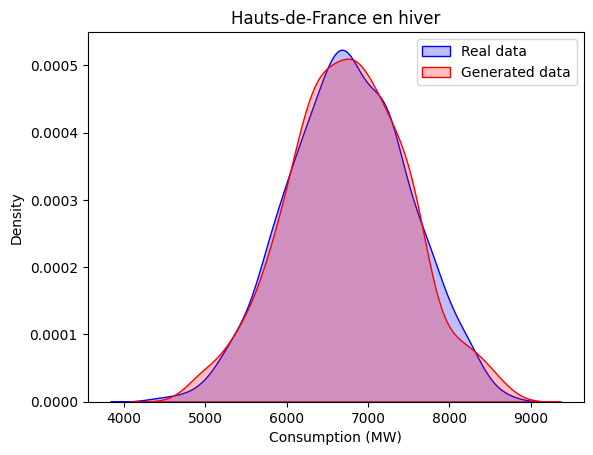

In [20]:
#On selectionne les données d'hiver (cf A.5)
dff= df[df['region'] == region_best_fit]
a=[]
for i in range(2012,2024):
    b=dff[(dff['date']>= str(i)+'-12-22') & (dff['date'] <= str(i+1)+'-03-21')] #Pour chaque hiver on selectionne les données
    a.append(b)
dff_hiver = pd.concat(a)

#On défini les estimateurs sur notre nouveau jeux de données
mufh = dff_hiver['consumption'].mean()
nfh = dff_hiver['consumption'].count()
nu_sqrfh= dff_hiver['consumption'].apply(lambda x: (x-mufh) ** 2).sum()/(nfh-1)

data = np.random.normal(mufh,np.sqrt(nu_sqrfh),nfh)
df_generate_datafh = pd.DataFrame({'consumption' : data})

sns.kdeplot(data=dff_hiver, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data=df_generate_datafh, x="consumption", label="Generated data", color='red', fill=True)
plt.title(region_best_fit+' en hiver')
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

On a :
$$ f(\mu |x_1,\ldots,x_n) = \frac {f_\mu(x_1,\ldots,x_n)*\pi(\mu)} {m^X(x_1,\ldots,x_n)}  $$
$$ avec\quad \mu \sim \mathcal{N}(\mu_0, \sigma_0^2) \quad , \quad ((x_1| \mu),\ldots,(x_n| \mu)) \stackrel{iid}\sim \mathcal{N}(\mu, \sigma^2) \quad et \quad m^X \quad un \quad facteur \quad de \quad normalisation $$

$$ \implies  f(\mu |x_1,\ldots,x_n) \propto  f_\mu(x_1,\ldots,x_n)*\pi(\mu) $$
$$ \propto \exp{-(\frac {\sum_{i=1}^n(x_i- \mu)^2} {2\sigma^2})} * \exp{-(\frac {(\mu - \mu_0)^2} {2\sigma_0^2})}   $$

$$ \propto \exp{-(\frac {\sum_{i=1}^n \mu^2 -2x_i\mu} {2\sigma^2})} * \exp{-(\frac {\mu^2 -2\mu\mu_0} {2\sigma_0^2})}  $$
$$ \propto \exp{-(\frac { n\mu^2\sigma_0^2 -2\mu\sigma_0^2\sum_{i=1}^n x_i + \mu^2\sigma^2 -2\mu\mu_0\sigma^2 } {2\sigma^2\sigma_0^2})} $$
$$ \propto \exp{-(\frac { \mu^2(n\sigma_0^2 +\sigma^2 )-2\mu(\sigma_0^2\sum_{i=1}^n x_i + \mu_0\sigma^2) } {2\sigma^2\sigma_0^2})} $$
$$ \propto \exp{-(\frac { \mu^2- 2\mu\frac {(\sigma_0^2\sum_{i=1}^n x_i + \mu_0\sigma^2)} {(n\sigma_0^2 +\sigma^2 )}} {\frac{2\sigma^2\sigma_0^2}{n\sigma_0^2 +\sigma^2}})} $$

$$ \implies (\mu | x_1,\ldots,x_n) \sim \mathcal{N}(\frac {\sigma_0^2\sum_{i=1}^n x_i + \mu_0\sigma^2} {n\sigma_0^2 +\sigma^2 }, \frac{\sigma^2\sigma_0^2}{n\sigma_0^2 +\sigma^2})   $$


2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [21]:
sigma_sqr = 400**2
sigma0_sqr = 500**2
mu0 = 3500

df_parametres = pd.DataFrame([])
moyenne = []
variance = []

for i in range(12,23):
    dfff = df_Bretagne_time_period[(df_Bretagne_time_period['date']< '20'+str(i+1)+'-06') & (df_Bretagne_time_period['date']>'20'+str(i)+'-06')]
    n_post = len(dfff)
    moyenne.append((sigma0_sqr*dfff['consumption'].sum() + mu0*sigma_sqr)/(n_post*sigma0_sqr + sigma_sqr))
    variance.append((sigma0_sqr*sigma_sqr)/(n_post*sigma0_sqr+sigma_sqr))

df_parametres['moyenne'] = moyenne
df_parametres['variance']= variance
new_index = pd.Index(range(13, 13 + len(df_parametres)))
df_parametres = df_parametres.set_index(new_index)
df_parametres

,moyenne,variance
13,3395.176091,1984.126984
14,3095.134598,1765.225066
15,3229.578553,1765.225066
16,3133.762549,1745.962462
17,3275.816417,1765.225066
18,3328.695940,1765.225066
19,3179.931598,1765.225066
20,3124.061545,1745.962462
21,3360.657546,1765.225066
22,3216.041483,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

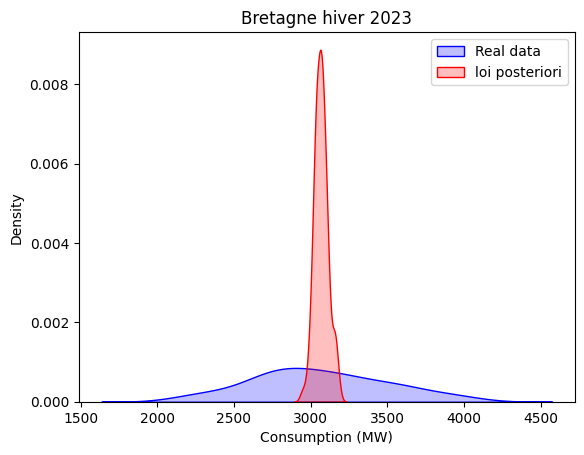

In [22]:
#Ce n'était pas clair dans l'énoncé mais j'ai décidé de prendre les données de l'hiver 2022/2023 plutot que de commencer le 1er janvier 2023
df_Bretagne_hiver_2023 = df_Bretagne_time_period[(df_Bretagne_time_period['date']< '2023-06') & (df_Bretagne_time_period['date']>'2022-06')]

n2023 = len(df_Bretagne_hiver_2023)
data2023 = np.random.normal(df_parametres.loc[23, 'moyenne'],np.sqrt(df_parametres.loc[23, 'variance']),n2023)
df_generate_data3 = pd.DataFrame({'consumption' : data2023})

sns.kdeplot(data=df_Bretagne_hiver_2023, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data=df_generate_data3, x="consumption", label="loi posteriori", color='red', fill=True)
plt.title('Bretagne hiver 2023')
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

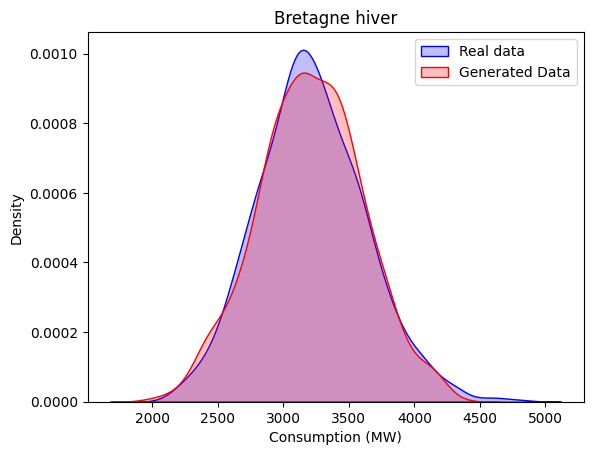

In [23]:
#On plot la loi qui représente à posteriori la Bretagne en hiver en choisissant comme moyenne la moyenne des moyennes aposterioti

moy_post = df_parametres['moyenne'].sum()/(len(df_parametres))


datatot = np.random.normal(moy_post, np.sqrt(sigma_sqr),len(df_Bretagne_time_period))
df_generate_data3 = pd.DataFrame({'consumption' : datatot})


sns.kdeplot(data=df_Bretagne_time_period, x="consumption", label="Real data", color='blue', fill=True)
sns.kdeplot(data=df_generate_data3, x="consumption", label="Generated Data", color='red', fill=True)
plt.title('Bretagne hiver')
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()



Votre réponse :

Les résultats obtenu ressemble beaucoup à ceux obtenu pour la dernière question de la partie A

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

Soit $X = (X_1, \dots, X_n)$ n échantillon gaussien $\mathcal{N} (\mu, \sigma_{2023}) $ qui représentent la consomation d'électricité en Bretagne pendant l'hiver 2023.
<br>Considérons l’hypothèse de base $H_0 =${$\sigma_{2023}= \sigma_0 = 500$}  et l’hypothèse alternative $H_1 = ${$\sigma_{2023}= \sigma_1 = 400$}

Le rapport de vraissemblance $RV$ vaut:
$$ RV(x_1, \dots, x_n)= \frac {f_{H_1}(x_1, \dots, x_n)} {f_{H_0}(x_1, \dots, x_n)} = 
(\frac {\sigma_0}{\sigma_1})^n \exp(\sum_{i=n}^n (x_i - \mu)^2(\frac 1 {2\sigma_0^2} - \frac 1 {2\sigma_1^2}))     $$

En posant $Z(X) = (\frac {\sigma_0}{\sigma_1})^n \exp(X(\frac 1 {2\sigma_0^2} - \frac 1 {2\sigma_1^2}))$, on a $Z$ qui est un fonction décroissante

Trouver un c tel que $P(Z(\sum_{i=n}^n (x_i - \mu)^2)>c |\sigma_0) = \alpha$ revient à trouver un d tel que $P(\sum_{i=n}^n (x_i - \mu)^2<d |\sigma_0) = \alpha $

$$  P(\sum_{i=n}^n (x_i - \mu)^2<d |\sigma_0) = P(\sum_{i=n}^n \frac{(x_i - \mu)^2}{\sigma_0^2}< \frac d {\sigma_0^2} )    $$

Sous l'hypothèse $H_0$, $ \frac{x_i - \mu}{\sigma_0} \sim \mathcal{N}(0,1) \quad \forall i \in [1,\dots,n]$, 
donc $\sum_{i=n}^n \frac{(x_i - \mu)^2}{\sigma_0^2}$ suit une loi $\chi^2$ à n degrés de liberté.

$$ \implies  P(\sum_{i=n}^n \frac{(x_i - \mu)^2}{\sigma_0^2}< \frac d {\sigma_0^2} ) = \alpha \quad \iff \quad  \frac d {\sigma_0^2} = q_{\alpha}    $$
Avec $ q_{\alpha} $ le quantil du khi-2 à n degrés de liberté d'ordre $\alpha$
<br>
<br> Le test du niveau $ \alpha $ est donc :
$$  \{ \sum_{i=n}^n (x_i - \mu)^2 < q_{\alpha}\sigma_0^2 \} $$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [24]:
chi2_dist = chi2(df=n2023)
quantile_1 = chi2_dist.ppf(0.01)

muD= 3200

if df_Bretagne_hiver_2023['consumption'].apply(lambda x: (x-muD) ** 2).sum() < quantile_1* 500**2 :
    print('L\'hypothése H0 est rejeté')
else:
    print('L\'hypothése H0 est accepté')

L'hypothése H0 est accepté


On accepte donc l'hypothèse $H_0$

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

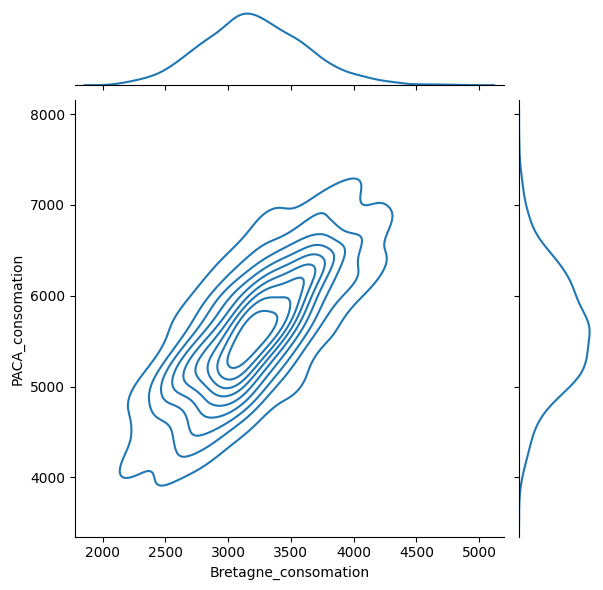

In [25]:
#On filtre pour selectionner les données en Provence-Alpes-Côte d'Azur en hiver
df_PACA =df[df.region == 'Provence-Alpes-Côte d\'Azur']
a=[]
for i in range(2012,2023):
    b=df_PACA[(df_PACA['date']>= str(i)+'-12-22') & (df_PACA['date'] <= str(i+1)+'-03-21')] #Pour chaque hiver on selectionne les données
    a.append(b)
df_PACA_hiver = pd.concat(a)

new_index2 = pd.Index(range(0, + len(df_PACA_hiver)))

a=df_Bretagne_time_period.set_index(new_index2)
b=df_PACA_hiver.set_index(new_index2)


df_join = pd.DataFrame([])

df_join['Bretagne_consomation'] = a['consumption']
df_join['PACA_consomation'] = b['consumption']
df_join


sns.jointplot(x='Bretagne_consomation', y='PACA_consomation', data=df_join, kind="kde" )

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse :

Les 2 régions ne se trouvent géographiquement pas très éloigné, donc quand il fait froid dans l'une il fait aussi froid dans l'autre. Voici pourquoi les régions ont consomation corrélé.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

In [26]:
#Création table de contingence

l=[]
for x in df_join['Bretagne_consomation']:
        if x<3000:
                l.append('A')
        elif 3000<= x < 4000:
                l.append('B')
        else:
                l.append('C')


l1 =[]
for x in df_join['PACA_consomation']:
        if x <5000:
                l1.append('W')
        elif 5000<= x < 6000:
                l1.append('X')
        elif 6000<= x < 7000:
                l1.append('Y')
        else:
                l1.append('Z')


data3 = {'Variable1': l,
        'Variable2': l1}

# Créez le tableau de contingence en utilisant la fonction crosstab de Pandas.
tableau = pd.crosstab(data3['Variable1'], data3['Variable2'])
ntab= len(df_join)
def nombre_colone(tab, i):
       return tab[i].sum()

def nombre_ligne(tab, i):
       return tab.T[i].sum()

def E(i,j,tab):
       return nombre_colone(tab, i)*nombre_ligne(tab, j)/ntab

T=0
for i in ['W','X','Y','Z']:
       for j in ['A','B','C'] :
              T+= ((tableau[i].loc[j] -E(i,j,tableau) )**2)/E(i,j,tableau)
print(T)

tableau

355.5738817831324


col_0,W,X,Y,Z
row_0,,,,
A,116,166,11,0
B,39,387,222,5
C,0,6,23,7


Votre réponse :

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [27]:
alpha = 0.01
chi2_dist = chi2(df = 6)
quantile_1 = chi2_dist.ppf(alpha)

if T > quantile_1:
    print("Les consommations dans les deux régions ne sont pas indépendantes.")
else:
    print("Les consommations dans les deux régions sont indépendantes.")


Les consommations dans les deux régions ne sont pas indépendantes.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.